In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import tanh
from IPython.display import clear_output
from sklearn import preprocessing
from sklearn.utils import shuffle

data = pd.read_csv('ML-CUP20-TR.csv',sep=',',index_col=0)
data = data.to_numpy()
tx = data[:,:-2]
ty = data[:,-2:]
tx.shape, ty.shape

((1523, 10), (1523, 2))

In [23]:
from MLP import *
n = MLP(  Nh=[20], Nu=10, Ny=2, f='tanh', f_out='ide', w_scale=2, w_range=.7)

In [24]:
# now i train my net. In this case i use classical momentum with no regularization. after training i plot some convergence-curves 
# using data i collected during training

init_w = np.copy(n.w)

# train the net with momentum training
g_m,e_m,t_m = n.momentum_train(tx, ty,alpha=2e-02,beta=5e-03,epsilon=1e-12,tresh=.01,max_epochs=2000)

n.w = init_w

# train the network with bundle method
from utils import proximal_bundle_method
g_b, e_b, t_b = proximal_bundle_method(n, tx, ty, mu=10, reg_param=1e-12)

optimal
0.06023618286724221


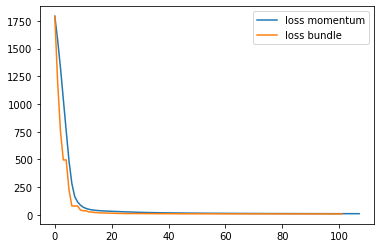

In [25]:
# plot the results with iterations
plt.plot( e_m,label='loss momentum')
plt.plot( e_b,label='loss bundle')
plt.legend()

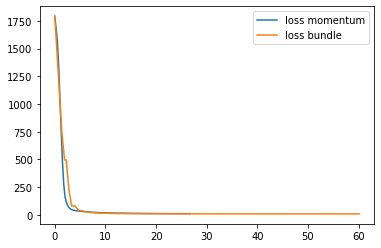

In [26]:
# plot the results with time
plt.plot(t_m, e_m,label='loss momentum')
plt.plot(t_b, e_b,label='loss bundle')
plt.legend()